In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Introduccion
En este ejercicio se trata de desarrollar mediante el metodo de la funcion inversa una distribucion exponencial con $\lambda=\frac{5}{h}$ en un tiempo maximo de $T=3h$ . Para ello se procede a partir de la funcion densidad de probabilidad $f(x)=A\cdot e^{-x\cdot A}$ entonces su integral es 

$${\displaystyle \int_{0}^{X} A\cdot e^{-x\cdot A}\,{\text{d}}x}
=\left. -e^{-x\cdot A} \right|_0^X = - ( e^{ -X\cdot A}-e^{-0 \cdot A}) 
= 1 - e^{-X \cdot A}$$



$${\displaystyle F(x)=P(X\leq x)=\left\{{\begin{matrix}0&{\text{para }}x<0\\1-e^{-X \cdot A}&{\text{para }}x\geq 0\end{matrix}}\right.}$$


Podemos entonces invertir. 

$$z = 1 - e^{-X \cdot A}$$
$$1-z= e^{-X \cdot A} $$

$$-\frac{ln(1-z)}{A} = X $$

como $z$ es una variable aleatoria $z\in(0,1)$  entonces $(1-z)\in(0,1)$ y podemos tomar una variable aleatoria $U=1-z$ con distribucion plana de tal manera que quede

$$-\frac{ln(U)}{A} = X $$

posteriormente, sumamos los saltos hasta que llega  a 3 horas, dando asi una media de $15=\frac{5}{h} \cdot 3 h$ y si sortemaos varias veces obtenemos la distribucion de poisson.


In [2]:
def procesopoiss(N,lambdaa,T):
    x=np.random.random(N)
    y=[]
    for j in range(N):
        y.append(-math.log(1-x[j])*(1/lambdaa))
    
    suma=0
    
    for i in range(N):
        if (suma>T):
            suma=suma-y[i-1]
            A=i-1 
            break
        else:
            suma=y[i]+suma
    return (suma,A)

In [22]:
lista2=[]
M=1000
l1=[]
l2=[]
for i in range (M):
    lista2,A=procesopoiss(1000,5,3)
    l1.append(A)
    l2.append(lista2)

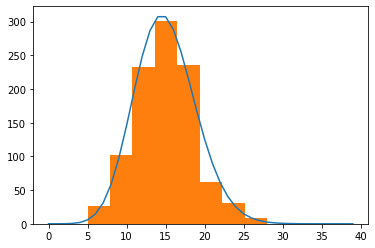

In [24]:


# comparacion teorica

# Graficando Poisson
pois=[]
A=3000
for i in range(40):
    x=A*((15**i)*math.exp(-15)/math.factorial(i))
    pois.append(x)

plt.plot(pois);
plt.hist(l1,bins=8);
plt.show()

# Conclusion

Vemos como el proceso de poisson simulado por los pasos de una variable con distribucion exponencial nos permiten ver como aleatoriamente la media deberia estar en 15,(efectivamente se ve eso) pero no se recibe siempre el valor de 15. La distribucion sigue Poisson teorica como se puede ver en la comparacion teorica.